# Importing and Opening Data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# open the csv file
with open('studentDepressionDataset.csv', 'r') as depressionDataset:
    #reads the csv file 
    df = pd.read_csv(depressionDataset)
# prints head data
print(df.head())
print(df.info())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8

# Cleaning Data Process

In [69]:
# Checking Null
df.dropna(inplace=True)

# Checking Duplicates
df.drop_duplicates(inplace=True)

# Dropping irrelevant columns
df.drop(df.columns.difference(['Gender', 'Age','CGPA','Study Satisfaction', 'Depression']), axis=1, inplace=True)

# Filtering for students less than or equal to 30 years
filtered_df = df[df['Age'] <= 30]

print(filtered_df.head())
print(filtered_df.info())

   Gender   Age  CGPA  Study Satisfaction  Depression
1  Female  24.0  5.90                 5.0           0
3  Female  28.0  5.59                 2.0           1
4  Female  25.0  8.13                 3.0           0
5    Male  29.0  5.70                 3.0           0
6    Male  30.0  9.54                 4.0           0
<class 'pandas.core.frame.DataFrame'>
Index: 16464 entries, 1 to 27899
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              16464 non-null  object 
 1   Age                 16464 non-null  float64
 2   CGPA                16464 non-null  float64
 3   Study Satisfaction  16464 non-null  float64
 4   Depression          16464 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 771.8+ KB
None


# Graph: Age vs. Depression

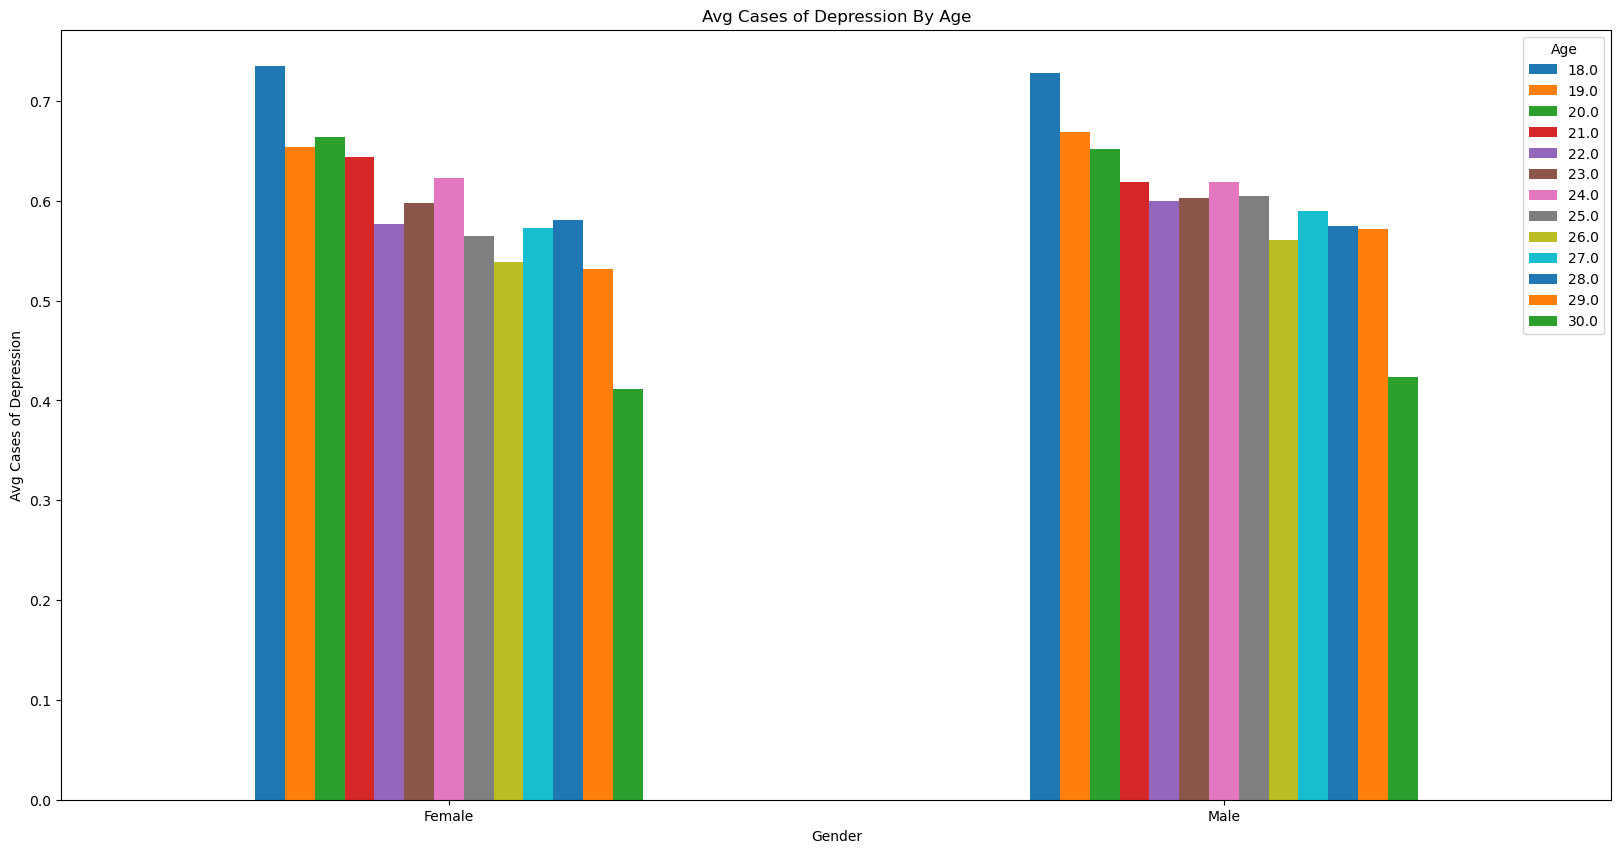

In [71]:
averageAge = filtered_df.groupby(['Gender', 'Age'])['Depression'].mean().unstack()

averageAge.plot(kind='bar', figsize=(20,10))
plt.xlabel('Gender')
plt.ylabel('Avg Cases of Depression')
plt.title('Avg Cases of Depression By Age')
plt.legend(title='Age')
plt.xticks(rotation=0)
plt.show()

# Graph: Study Satisfaction vs. Depression

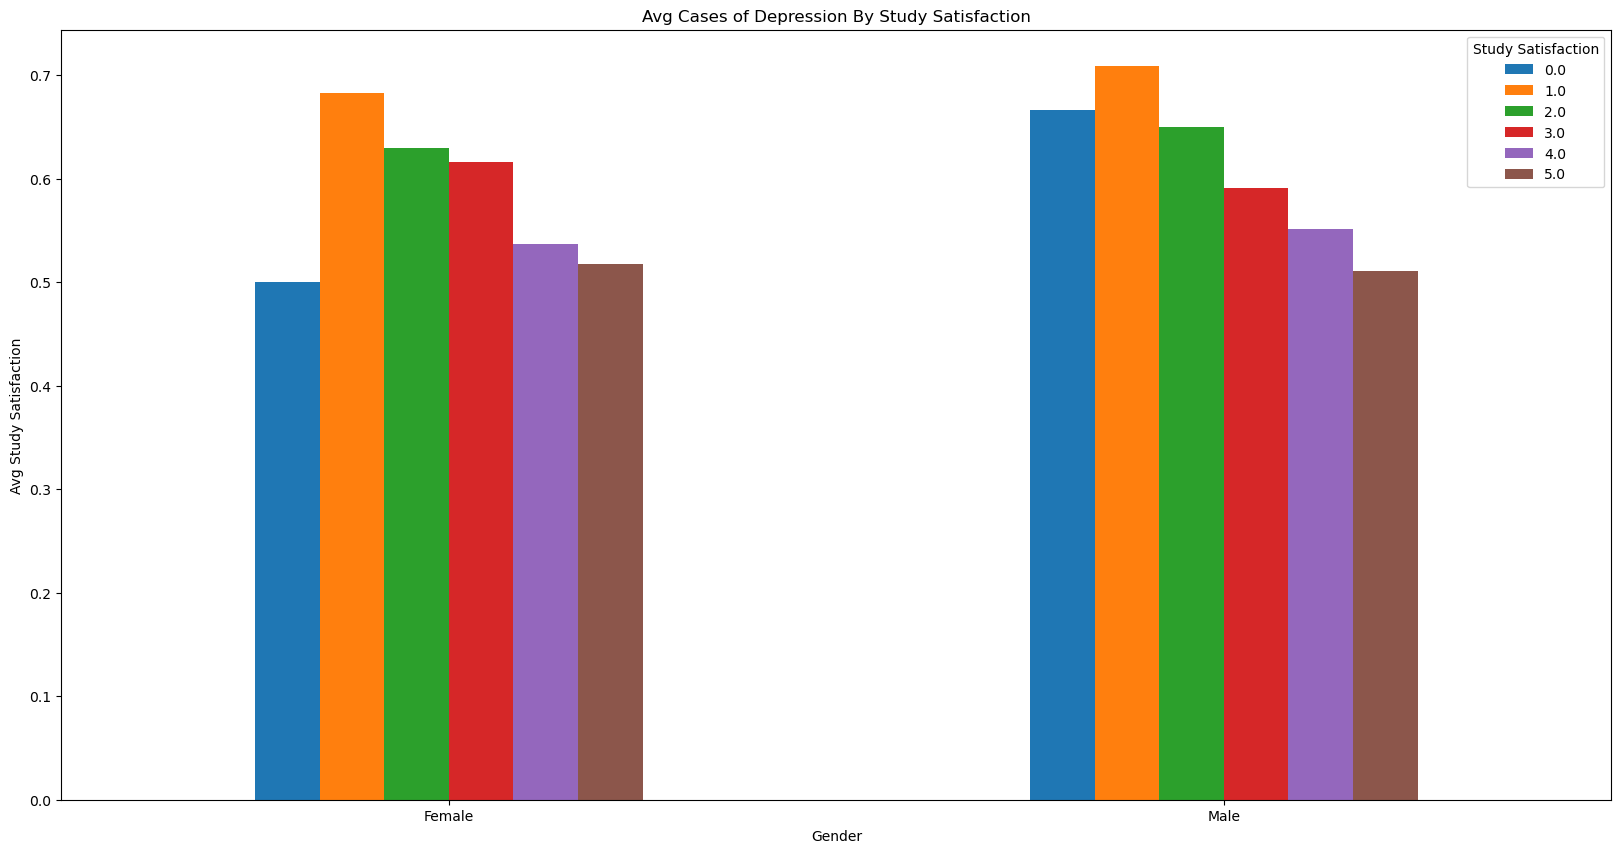

In [76]:
averageSS = filtered_df.groupby(['Gender', 'Study Satisfaction'])['Depression'].mean().unstack()

averageSS.plot(kind='bar', figsize=(20,10))
plt.xlabel('Gender')
plt.ylabel('Avg Study Satisfaction')
plt.title('Avg Cases of Depression By Study Satisfaction')
plt.legend(title='Study Satisfaction')
plt.xticks(rotation=0)
plt.show()